#### Analysis of the scVI batch corrected counts and leiden cluster
#### Perform cell type annotation

In [51]:
import scvi
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
%%time
adata = sc.read_h5ad("scvi_adata.h5ad")

CPU times: user 1.18 s, sys: 2.21 s, total: 3.39 s
Wall time: 3.38 s


In [4]:
adata.obs.head()

,donor_id,sex,age,directory,study,technology,cell_or_nuclei,region,n_genes_by_counts,log1p_n_genes_by_counts,...,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_genes,doublet_score,predicted_doublet,_scvi_batch,_scvi_labels,leiden_scVI
ENCSR906MRL:AAACAGCCAAATTCGT,ENCSR906MRL,male,44,ENCFF201LRF,ENCODE v4 (Snyder),Multiome-v1,Nuclei,LV,887,6.788972,...,2.662722,0.0,0.0,0.0,887,0.046906,False,6,0,2
ENCSR906MRL:AAACAGCCAATTAGGA,ENCSR906MRL,male,44,ENCFF201LRF,ENCODE v4 (Snyder),Multiome-v1,Nuclei,LV,3116,8.044626,...,0.623016,0.0,0.0,0.0,3115,0.031411,False,6,0,0
ENCSR906MRL:AAACAGCCAATTGAAG,ENCSR906MRL,male,44,ENCFF201LRF,ENCODE v4 (Snyder),Multiome-v1,Nuclei,LV,4193,8.341410,...,1.962408,0.0,0.0,0.0,4193,0.184701,False,6,0,5
ENCSR906MRL:AAACAGCCACAATTAC,ENCSR906MRL,male,44,ENCFF201LRF,ENCODE v4 (Snyder),Multiome-v1,Nuclei,LV,2460,7.808323,...,2.678977,0.0,0.0,0.0,2458,0.192271,False,6,0,4
ENCSR906MRL:AAACAGCCACCGGTAT,ENCSR906MRL,male,44,ENCFF201LRF,ENCODE v4 (Snyder),Multiome-v1,Nuclei,LV,731,6.595781,...,4.244694,0.0,0.0,0.0,731,0.058205,False,6,0,2


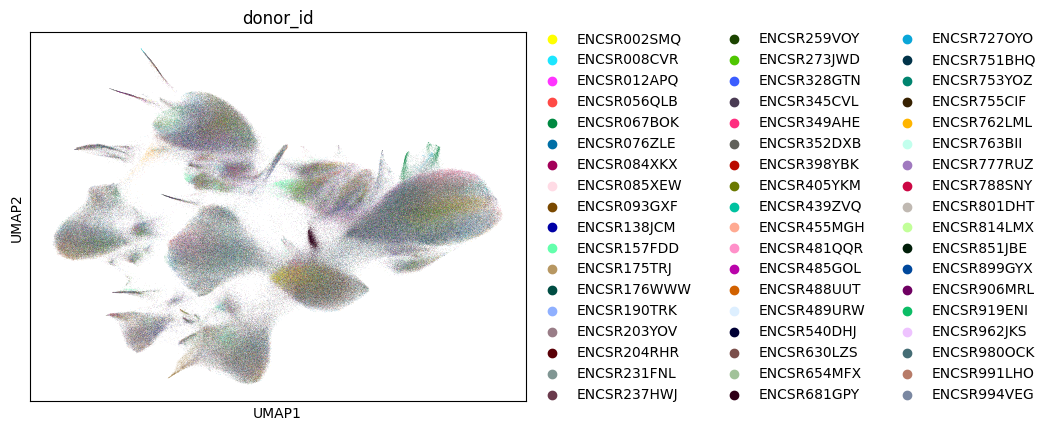

In [6]:
sc.pl.umap(adata, color=["donor_id"])

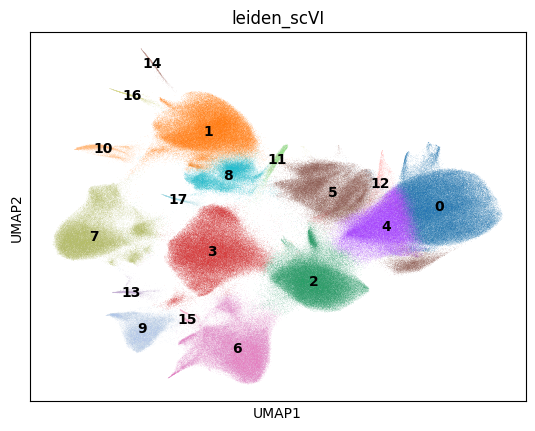

In [7]:
sc.pl.umap(adata, color=["leiden_scVI"], legend_loc = "on data")

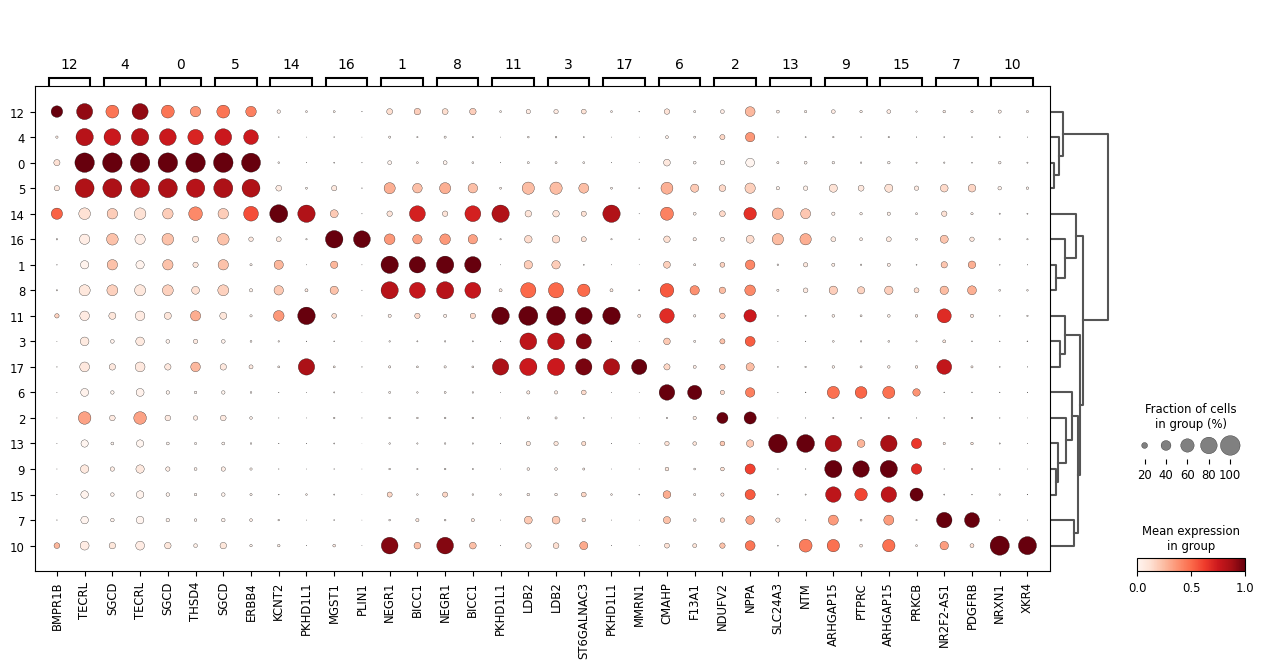

In [9]:
sc.pl.rank_genes_groups_dotplot(adata, groupby="leiden_scVI", standard_scale="var", n_genes=2)

### Based on these marker genes:

- Cardiomyocytes: 0, 2 (Atrial), 4, 5
- Fibroblasts: 1, 8
- Endothelial: 3
- Myeloid: 6
- Pericyte: 7
- Lymphoid: 9, 15
- Neuronal: 10
- Endocardial: 11
- Noisy: 12
- Mast: 13
- Endocardial: 13
- Epicardial: 14
- Adipocyte: 16
- LEC: 17

In [47]:
#sc.get.rank_genes_groups_df(adata, group="11").head(20)

Add cell type annotations

In [44]:
adata.obs["cell_type"] = adata.obs["leiden_scVI"].map(
    {
        "0": "CM-1",
        "1": "Fib-1",
        "2": "Atrial CM",
        "3": "Endothelial",
        "4": "CM-2",
        "5": "CM-3",
        "6": "Myeloid",
        "7": "Pericyte",
        "8": "Fib-2",
        "9": "Lymphoid-1",
        "10": "Neuronal",
        "11": "Endocardial",
        "12": "Noisy",
        "13": "Mast",
        "14": "Epicardial",
        "15": "Lymphoid-2",
        "16": "Adipocyte",
        "17": "LEC"
    }
)

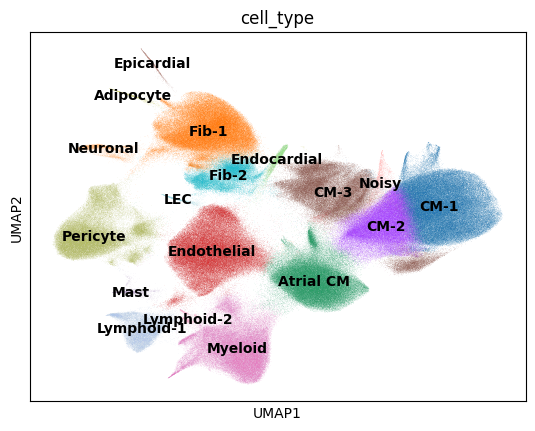

In [45]:
sc.pl.umap(adata, color=["cell_type"], legend_loc = "on data")

Examine the cell type proportions for each donor

In [53]:
adata_metadata = adata.obs
donor_level_metadata = adata_metadata[["sex", "age", "donor_id", "study", "technology"]].drop_duplicates().reset_index(drop = True)

In [60]:
cell_type_counts_per_donor = pd.crosstab(adata_metadata['cell_type'], adata_metadata['donor_id'])
cell_type_counts_per_donor.head()

donor_id,ENCSR002SMQ,ENCSR008CVR,ENCSR012APQ,ENCSR056QLB,ENCSR067BOK,ENCSR076ZLE,ENCSR084XKX,ENCSR085XEW,ENCSR093GXF,ENCSR138JCM,...,ENCSR801DHT,ENCSR814LMX,ENCSR851JBE,ENCSR899GYX,ENCSR906MRL,ENCSR919ENI,ENCSR962JKS,ENCSR980OCK,ENCSR991LHO,ENCSR994VEG
cell_type,,,,,,,,,,,,,,,,,,,,,
CM-1,2604,2641,1425,3195,5100,2911,2121,1469,2655,2515,...,2212,2579,2288,1008,3348,2304,1380,3209,1063,4343
Fib-1,2886,2179,2356,648,1327,2273,2294,1507,2736,3166,...,1822,1530,1736,522,1468,2395,1356,1126,1096,1693
Atrial CM,8335,2475,51,145,67,797,1118,2709,572,1134,...,160,502,3999,40,7301,2512,504,444,2772,5324
Endothelial,1579,2438,1755,1055,1005,1541,905,825,1705,2954,...,1429,1124,1683,1776,1970,2262,1880,1055,1288,1964
CM-2,938,697,1566,345,942,528,2268,536,1303,4574,...,1446,970,1946,346,2602,3393,449,703,285,2335


In [61]:
norm_cell_type_counts_per_donor = 100 * cell_type_counts_per_donor.div(cell_type_counts_per_donor.sum(axis = 1), axis = 0)

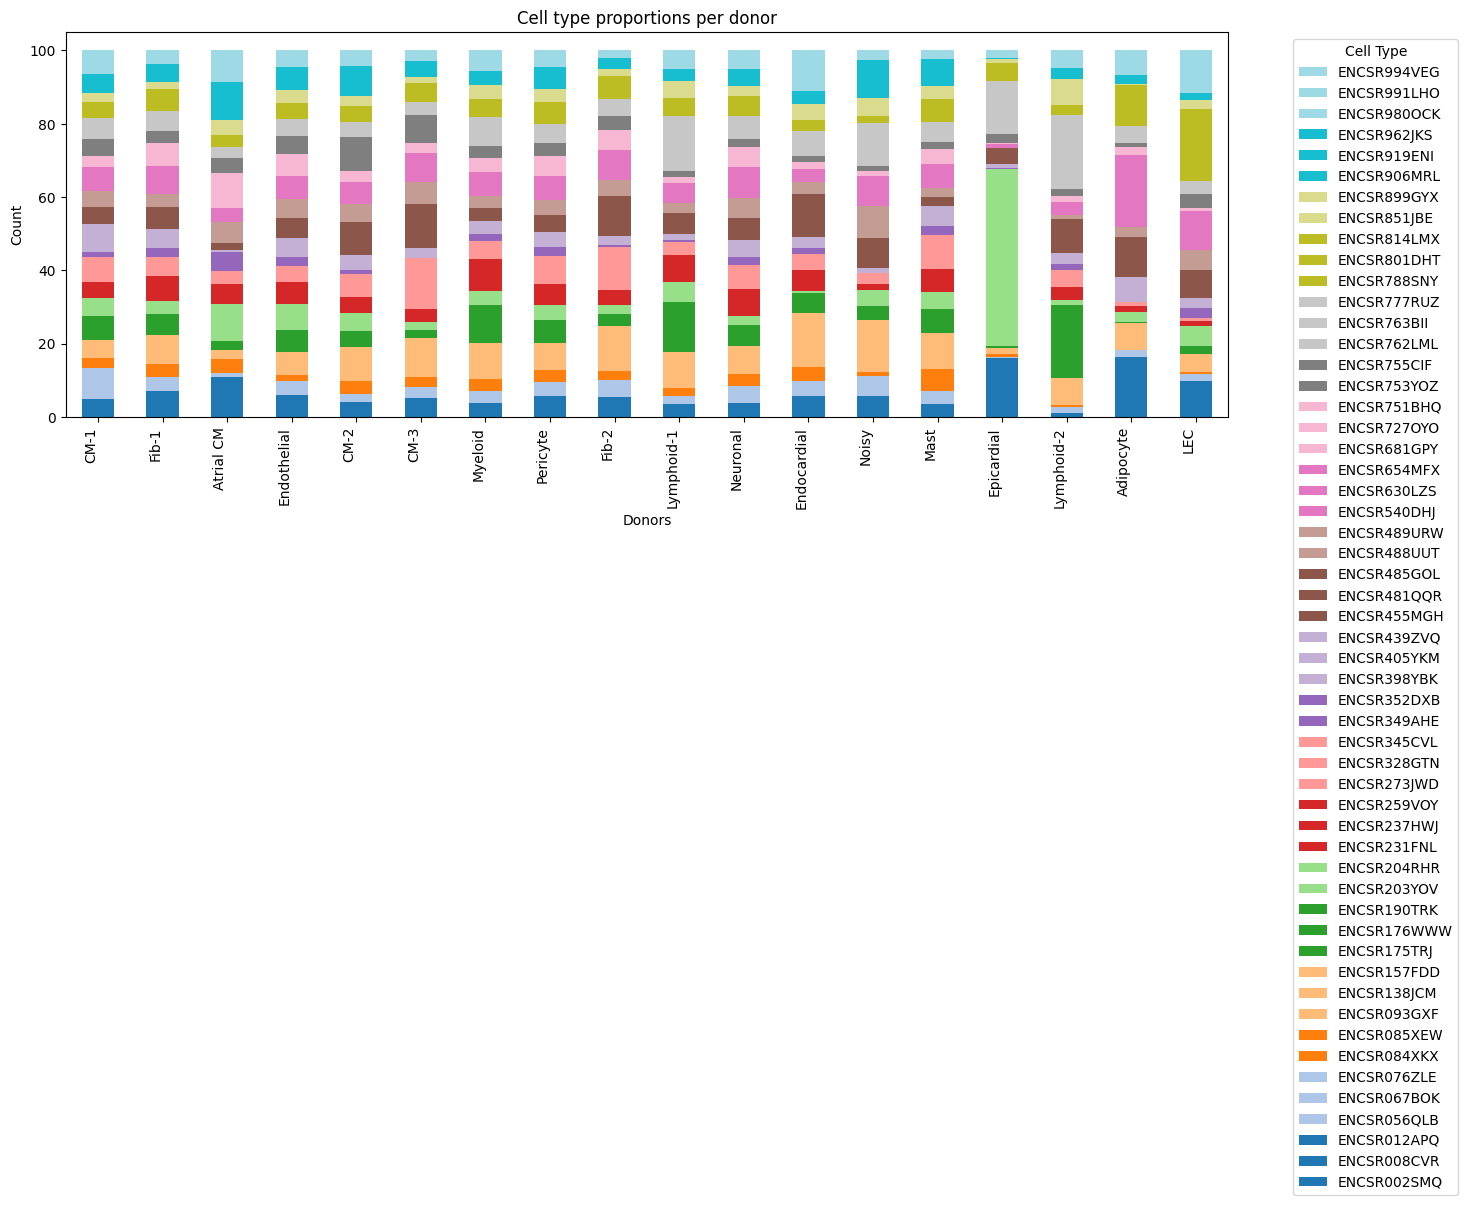

In [64]:
ax = norm_cell_type_counts_per_donor.plot(kind = 'bar', stacked=True, figsize=(15, 5), colormap='tab20')
# Adding labels and title
ax.set_xlabel('Donors')
ax.set_ylabel('Count')
ax.set_title('Cell type proportions per donor')

# Reverse the legend order
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-ticks for better readability
plt.xticks(rotation=90, ha='right')
plt.show()

### Examine level of ambient RNA

In [70]:
adata.var_names

Index(['DDX11L1', 'OR4F5', 'MTND1P23', 'MTCO1P12', 'CFAP74', 'ICMT',
       'LINC00337', 'SPSB1', 'NPPA', 'NPPB',
       ...
       'PRY', 'OFD1P10Y', 'OFD1P11Y', 'USP9YP12', 'CDY18P', 'OFD1P13Y',
       'OFD1P18Y', 'OFD1P15Y', 'REREP2Y', 'TPTE2P4'],
      dtype='object', name='gene_name', length=2000)

In [80]:
# this only includes 2000 genes, so need to transfer the annotations over to the raw data
adata.obs.to_csv("cell_type_annotations.csv")
len(adata.var)

2000

In [74]:
adata.write("scvi_cell_type_annotated.h5ad")